# Chances of Promotion Directly to La Liga
### David González Álvarez

This project presents a data-driven approach to simulate the Spanish football league's (La Liga) final standings and calculate the probabilities of each team's direct promotion or playoffs based on Monte Carlo simulations. The code is implemented in Python and relies on data from this seasons to simulate the outcomes of the remaining matches in the current season. The notebook includes the necessary code to simulate match results, calculate league standings, and determine the probabilities of each team's final position.

Specifically, we focus on the second division of La Liga (also known as La Liga SmartBank), where teams compete for direct promotion to the first division or must play in the promotion playoff. We start by analyzing the current standings and calculating the probabilities of each team finishing in the top two positions, which guarantee direct promotion. Then, we simulate the remaining matches using a Monte Carlo approach to generate thousands of possible outcomes, from which we derive the final probabilities of each team's promotion or relegation.

The notebook includes visualizations of the results, such as probability distributions and confidence intervals, to provide a clear understanding of the range of possible outcomes. Overall, this project showcases the power of data analysis and simulation techniques to provide insights into the complex dynamics of football leagues and sports in general.

In [90]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import statistics
import math
import numpy as np

We read in our data source the points currently held by the teams that are in contention for direct promotion.

In [8]:
df=pd.read_excel('data\\UD Las Palmas 2022-2023.xlsx')

In [9]:
df

,Jornada,Fecha,Hora,Comp,Día,Sedes,Resultado,GF,GC,Adversario,...,Prom candidatos,Min candidatos,Max candidatos,Clasif Eibar,Clasif Granada,Clasif Alaves,Clasif Levante,Clasif Las Palmas,1º,2º
0,1,2022-08-13,22:00 (23:00),Segunda División,Sáb,Local,E,0.0,0.0,Zaragoza,...,0.8,0.0,2.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0
1,2,2022-08-22,22:00:00,Segunda División,Lun,Visitante,V,4.0,0.0,Málaga,...,2.2,0.0,4.0,4.0,6.0,6.0,2.0,4.0,6.0,6.0
2,3,2022-08-29,21:00 (22:00),Segunda División,Lun,Local,V,2.0,0.0,Andorra,...,3.8,2.0,7.0,7.0,9.0,7.0,5.0,7.0,9.0,7.0
3,4,2022-09-03,14:00:00,Segunda División,Sáb,Visitante,E,1.0,1.0,Alavés,...,3.4,1.0,6.0,7.0,9.0,8.0,6.0,8.0,9.0,8.0
4,5,2022-09-09,20:00 (21:00),Segunda División,Vie,Local,V,1.0,0.0,Leganés,...,4.4,2.0,7.0,10.0,9.0,11.0,9.0,11.0,11.0,11.0
5,6,2022-09-18,18:30:00,Segunda División,Dom,Visitante,E,0.0,0.0,Racing Sant,...,4.2,3.0,7.0,10.0,12.0,14.0,9.0,12.0,14.0,12.0
6,7,2022-09-26,20:00 (21:00),Segunda División,Lun,Local,V,2.0,0.0,Granada,...,4.4,1.0,9.0,13.0,12.0,15.0,10.0,15.0,15.0,15.0
7,8,2022-10-01,16:15:00,Segunda División,Sáb,Visitante,E,3.0,3.0,CD Mirandés,...,4.4,1.0,9.0,14.0,13.0,18.0,10.0,16.0,18.0,16.0
8,9,2022-10-08,17:30 (18:30),Segunda División,Sáb,Local,E,0.0,0.0,UD Ibiza,...,3.6,1.0,9.0,15.0,14.0,18.0,10.0,17.0,18.0,17.0
9,10,2022-10-12,21:00:00,Segunda División,Mié,Visitante,V,1.0,0.0,Lugo,...,5.2,2.0,10.0,18.0,17.0,19.0,13.0,20.0,20.0,19.0


Current score of each team and matches to be played

In [76]:
# Puntuación actual de cada equipo y partidos por jugar
Jornada=37
equipos = {
    'Eibar': {'puntos': df.loc[df['Jornada']==Jornada, 'Clasif Eibar'].item() , 'partidos': ['Granada', 'Las Palmas', 'Racing', 'Sporting', 'Huesca']},
    'Alaves': {'puntos': df.loc[df['Jornada']==Jornada, 'Clasif Alaves'].item(), 'partidos': ['Levante', 'Granada', 'Albacete', 'Malaga', 'Las Palmas']},
    'Granada': {'puntos': df.loc[df['Jornada']==Jornada, 'Clasif Granada'].item(), 'partidos': ['Eibar', 'Alaves', 'Lugo', 'Mirandes', 'Leganes']},
    'Las Palmas': {'puntos': df.loc[df['Jornada']==Jornada, 'Clasif Las Palmas'].item(), 'partidos': ['Zaragoza', 'Eibar', 'Villarreal B', 'Cartagena', 'Alaves']}, 
    'Levante': {'puntos': df.loc[df['Jornada']==Jornada, 'Clasif Levante'].item(), 'partidos': ['Alaves', 'Tenerife', 'Ibiza', 'Villarreal B', 'Oviedo']}
}

We define the number of simulations. 

·  The function simular_partido, is responsible for simulating a match and returning its result. In this function, the    designation of the result is completely random.

·  And finally the function simular_partidos_equipo, simulates the next matches of each team and returns their final score.

In [108]:

# Número de simulaciones a realizar
num_simulaciones = 10000

# Función para simular un partido y devolver su resultado
def simular_partido():
    # Aquí se puede agregar cualquier lógica de simulación de partidos
    # Por ejemplo, puedes generar un número aleatorio entre 0 y 1
    # y utilizar una regla para determinar si el resultado es una victoria,
    # empate o derrota para cada equipo. Puedes ajustar la regla según
    # tus necesidades y datos históricos.
    resultado = random.choices(['victoria', 'empate', 'derrota'], weights=[0.4, 0.3, 0.3])[0]
    return resultado

# Función para simular los próximos partidos de cada equipo y devolver su puntuación final
def simular_partidos_equipo(equipo):
    puntuacion = equipo['puntos']
    for partido in equipo['partidos']:
        resultado = simular_partido()
        if resultado == 'victoria':
            puntuacion += 3
        elif resultado == 'empate':
            puntuacion += 1
    return puntuacion



The code defines two functions: simular_partidos_equipo() and simular_ascensos(). 

The first function simulates the score for a given team in the remaining matches based on a pre-defined probability distribution. 
The second function simulates the outcome for each team and computes the probability of each outcome. The resulting probabilities are plotted using the matplotlib library. 

The code is useful for predicting the likelihood of promotion for each team, which can be used by fans, analysts, and sports betting enthusiasts.

In [81]:
import matplotlib.pyplot as plt
# Función para simular todas las posibles combinaciones de resultados de los próximos partidos
# y devolver la cantidad de veces que cada equipo obtiene la cantidad de puntos necesarios
# para ascender directamente, estar en posición de playoff o no ascender.

def simular_ascensos():
    resultados = {'Eibar': [0, 0, 0, 0, 0], 'Alaves': [0, 0, 0, 0, 0], 'Granada': [0, 0, 0, 0, 0], 'Las Palmas': [0, 0, 0, 0, 0], 'Levante': [0, 0, 0, 0, 0] }
    probabilidades_ascenso = {'Eibar': [], 'Alaves': [], 'Granada': [], 'Las Palmas': [], 'Levante': []}
    
    for i in range(num_simulaciones):
        puntuaciones = {}
        for equipo in equipos:
            puntuaciones[equipo] = simular_partidos_equipo(equipos[equipo])
        sorted_puntuaciones = sorted(puntuaciones.items(), key=lambda x: x[1], reverse=True)
        for j in range(5):
            equipo = sorted_puntuaciones[j][0]
            puntos = sorted_puntuaciones[j][1]
            if j < 2 and puntos - puntuaciones[sorted_puntuaciones[j+1][0]] >= 2:
                resultados[equipo][0] += 1
            elif j == 2 and puntos - puntuaciones[sorted_puntuaciones[j-1][0]] >= 3:
                resultados[equipo][0] += 1
            elif puntos >= 58:
                resultados[equipo][1] += 1
            else:
                resultados[equipo][2] += 1
        
        for equipo in equipos:
            prob_ascenso = resultados[equipo][0]/(i+1)
            probabilidades_ascenso[equipo].append(prob_ascenso)
    
    
    for equipo in resultados:
        print(f'Equipo {equipo}: {resultados[equipo][0]/num_simulaciones:.2%} de probabilidad de ascenso directo.')
        plt.plot(probabilidades_ascenso[equipo], label=equipo)
    
    plt.legend()
    plt.title('Distribución de Probabilidades de Ascenso')
    plt.xlabel('Número de simulaciones')
    plt.ylabel('Probabilidad de Ascenso Directo')
    plt.show()

Equipo Eibar: 36.23% de probabilidad de ascenso directo.
Equipo Alaves: 27.18% de probabilidad de ascenso directo.
Equipo Granada: 19.00% de probabilidad de ascenso directo.
Equipo Las Palmas: 11.38% de probabilidad de ascenso directo.
Equipo Levante: 6.21% de probabilidad de ascenso directo.


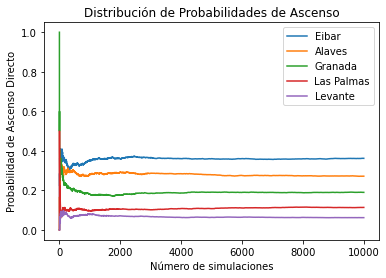

In [84]:
if __name__ == '__main__':
    resultados = simular_ascensos()
   

simular_ascensos1 is the same as the previous one, however, in this one we add the calculation of the confidence intervals of each team and they are printed on the screen together with the percentage of probabilities of direct promotion.

In [111]:
def simular_ascensos1():
    resultados = {'Eibar': [0, 0, 0, 0, 0], 'Alaves': [0, 0, 0, 0, 0], 'Granada': [0, 0, 0, 0, 0], 'Las Palmas': [0, 0, 0, 0, 0], 'Levante': [0, 0, 0, 0, 0] }
    probabilidades_ascenso = {'Eibar': [], 'Alaves': [], 'Granada': [], 'Las Palmas': [], 'Levante': []}
    for i in range(num_simulaciones):
        puntuaciones = {}
        for equipo in equipos:
            puntuaciones[equipo] = simular_partidos_equipo(equipos[equipo])
        sorted_puntuaciones = sorted(puntuaciones.items(), key=lambda x: x[1], reverse=True)
        for j in range(5):
            equipo = sorted_puntuaciones[j][0]
            puntos = sorted_puntuaciones[j][1]
            if j < 2 and puntos - puntuaciones[sorted_puntuaciones[j+1][0]] >= 2:
                resultados[equipo][0] += 1
            elif j == 2 and puntos - puntuaciones[sorted_puntuaciones[j-1][0]] >= 3:
                resultados[equipo][0] += 1
            elif puntos >= 58:
                resultados[equipo][1] += 1
            else:
                resultados[equipo][2] += 1
        for equipo in equipos:
            prob_ascenso = resultados[equipo][0]/(i+1)
            probabilidades_ascenso[equipo].append(prob_ascenso)
            
    conf_intervals = []
    for equipo in resultados:
        p = resultados[equipo][0] / num_simulaciones
        error = 1.96 * np.sqrt(p * (1-p) / num_simulaciones)
        conf_intervals.append((p - error, p + error))
        print(f"Equipo {equipo}: {p:.2%} ± {error:.2%}")
        plt.hist(np.random.normal(p, error, 10000), bins=40, alpha=0.5, label=equipo)
        
        
    plt.legend()
    plt.title('Distribución de Probabilidades de Ascenso Directo')
    plt.xlabel('Probabilidad de Ascenso')
    plt.ylabel('Frecuencia')
    plt.show()
    return conf_intervals

Equipo Eibar: 36.50% ± 0.94%
Equipo Alaves: 28.33% ± 0.88%
Equipo Granada: 18.41% ± 0.76%
Equipo Las Palmas: 11.17% ± 0.62%
Equipo Levante: 6.41% ± 0.48%


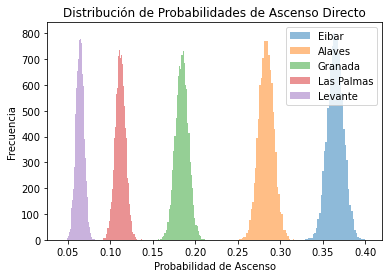

In [113]:
if __name__ == '__main__':
    resultados = simular_ascensos1()
   